In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [42]:
import pandas as pd
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df["target"] =iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
from sklearn.preprocessing import MinMaxScaler
msk = MinMaxScaler()
df["sepal length (cm)"] = msk.fit_transform(df[["sepal length (cm)"]])
df["petal length (cm)"] = msk.fit_transform(df[["petal length (cm)"]])
df["sepal width (cm)"] = msk.fit_transform(df[["sepal width (cm)"]])
df["petal width (cm)"] = msk.fit_transform(df[["petal width (cm)"]])
df ["target"] = msk.fit_transform(df[["target"]])

In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.500000
std,0.230018,0.181611,0.299203,0.317599,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


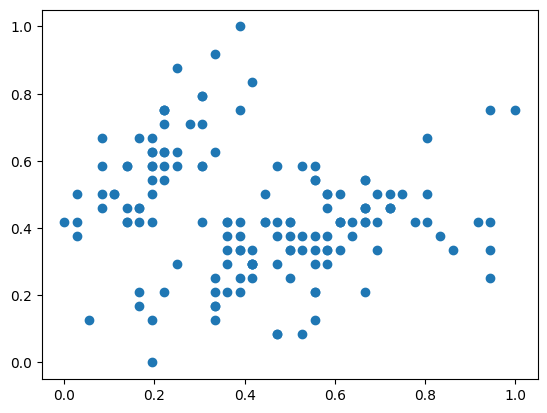

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"])

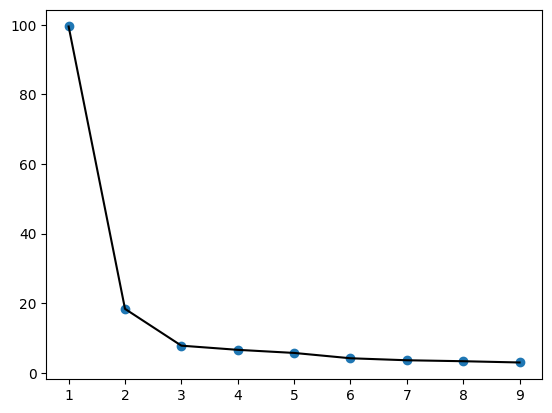

In [54]:
from sklearn.cluster import KMeans
km =KMeans()
sse = []
k_range = range(1,10)

for i in k_range:
    km = KMeans(n_clusters= i)
    km.fit(df)
    sse.append(km.inertia_)

plt.scatter(k_range,sse)
plt.plot(k_range,sse, color ="black")


In [48]:
km = KMeans(n_clusters= 2)
y_pred = km.fit_predict(df)
df["cluster"] = y_pred
df.head()
df0 = df.loc[df.cluster == 0]
df1 = df.loc[df.cluster == 1]

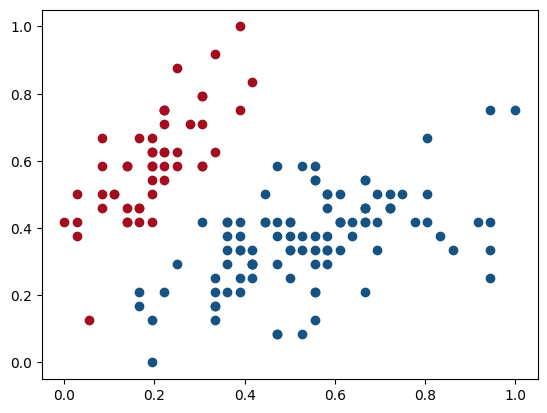

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color ="#175382")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color = "#a20e20")